In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df = pd.read_csv('gistfile1.txt', sep=',') # I deliberately didn't sync this to GitHub, please provide your own copy
print len(df)
df.head()

2339


,accounts_provisioned,district_size,created,app_id,district_id
0,12025,11990,8/15/2013,61,376
1,11972,11953,8/29/2013,6,492
2,11949,11964,8/4/2014,6,1523
3,11820,11822,10/23/2014,476,2619
4,11797,11868,10/9/2013,61,682


In [2]:
df['install_rate'] = df.accounts_provisioned.div(df.district_size)
df.describe().T
# Looks like install rate exploded

,count,mean,std,min,25%,50%,75%,max
accounts_provisioned,2339,1573.577597,2277.577032,0,16.000000,622.000000,2044.5,1.202500e+04
district_size,2339,2349.800770,2813.862265,0,238.500000,1174.000000,3704.0,1.199000e+04
app_id,2339,470.159042,702.960960,2,54.000000,154.000000,471.0,2.739000e+03
district_id,2339,1232.386917,777.817082,2,552.500000,1160.000000,1849.5,2.894000e+03
install_rate,1988,inf,NaN,0,0.445891,0.992928,1.0,inf


In [3]:
df[df.install_rate.isnull()]
# 0 accounts_provisioned and 0 district_size... maybe bad data capture?

,accounts_provisioned,district_size,created,app_id,district_id,install_rate
1779,0,0,1/29/2013,3,59,NaN
1780,0,0,3/20/2013,6,83,NaN
1781,0,0,3/20/2013,6,84,NaN
1782,0,0,4/3/2013,6,98,NaN
1783,0,0,4/15/2013,6,106,NaN
1784,0,0,4/18/2013,6,113,NaN
1785,0,0,4/22/2013,54,115,NaN
1786,0,0,5/22/2013,6,152,NaN
1787,0,0,5/28/2013,6,160,NaN
1788,0,0,5/30/2013,14,161,NaN


# Questions
1. <a href=#Bad-Data>Dig into the 'bad data'</a>
2. <a href=#Apps-per-District-Distribution>Distribution of apps per district</a>
3. <a href=#Install-Rate>Distribution of `install_rate`, and what are top apps/districts for `install_rate`?</a>
4. <a href=#Multi-App-Districts>Do districts tend to have similar `install_rate` for all their apps?</a>
5. <a href=#Growth>Growth in `install_rate`, apps, districts</a>
6. <a href=#By-District-Size>Preferences by small/med/big districts</a>
7. <a href=#Most-Popular>Most popular apps, by `accounts_provisioned` and # districts covered</a>

### <a href=#Summary>Summary of Findings</a>

# Bad Data

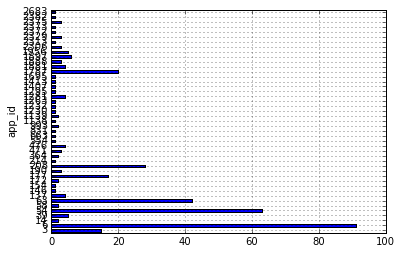

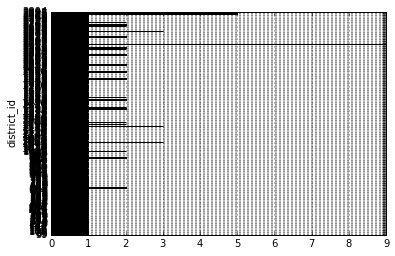

In [4]:
# trying to see if it's app- or district-specific
df_nulls = df[df.district_size == 0]
df_nulls.groupby('app_id').count().created.plot(kind='barh')
plt.figure()
df_nulls.groupby('district_id').count().created.plot(kind='barh')
# possibly app-specific since most districts only have 1 null record, and at most 9

94 apps in this dataset
94
1680 districts in this dataset


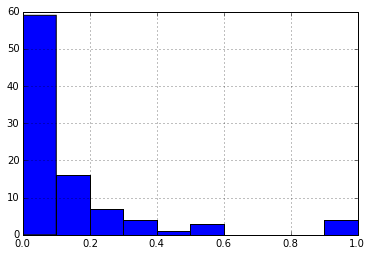

In [5]:
# is data broken for certain apps?
df_nona = df[df.district_size > 0]

df_nona_app = df_nona.groupby('app_id').count().created
df_nulls_app = df_nulls.groupby('app_id').count().created

apps = pd.concat([df_nona_app, df_nulls_app], axis=1, join='outer')
apps.columns = ['has_data', 'no_data']
print str(len(apps)) + ' apps in this dataset'
print len(df.app_id.unique())
print str(len(df.district_id.unique())) + ' districts in this dataset'
apps.fillna(0, inplace=True)
apps['bad_rate'] = apps.no_data.astype(float) / (apps.has_data + apps.no_data)
apps.bad_rate.hist()

In [6]:
apps[apps.bad_rate > 0.8]

,has_data,no_data,bad_rate
app_id,,,
831,0,1,1
1281,0,4,1
1413,0,1,1
1695,0,1,1


In [7]:
print str(len(df.district_id[(df.district_size == 0) & (df.accounts_provisioned <> 0)].unique())) + ' districts w/ no size but w accounts'
print str(len(df.district_id[(df.district_size == 0) & (df.accounts_provisioned == 0)].unique())) + ' districts w/ neither'

6 districts w/ no size but w accounts
313 districts w/ neither


In [8]:
# same for district
print '{} districts w bad data'.format(len(df_nulls.district_id.unique()))
print "{} districts w bad data that don't have good data".format(len(np.setdiff1d(df_nulls.district_id.unique(), 
                                                                                  df_nona.district_id.unique())))
print 'This is {:.1f}% of all districts'.format(float(len(df_nulls)) / len(df_nona) * 100)

319 districts w bad data
319 districts w bad data that don't have good data
This is 18.0% of all districts


Looks like 313 districts, or 18%, did not provide data on their `district_size` and `accounts_provisioned` (contractual agreement? access token was no good? Worth investigation). These will be dropped from the rest of the analysis.

<a href=#Questions>Return to top</a>
# Apps per District Distribution

1     1336
2      223
3       57
4       27
5       11
7       10
6        7
17       1
16       1
15       1
13       1
12       1
11       1
10       1
9        1
8        1
dtype: int64

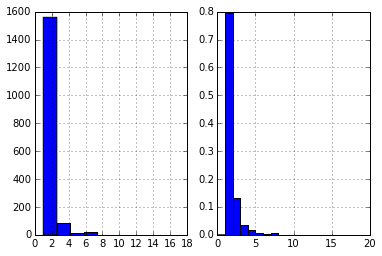

In [9]:
# Note in this case I can use all districts since I'm looking at apps per district and not concerned with install base
fig = plt.figure()
fig.add_subplot(121)
df.groupby('district_id').count().app_id.hist()
fig.add_subplot(122)
df.groupby('district_id').count().app_id.hist(range=(0,20), bins=20, normed=True)
df.groupby('district_id').count().app_id.value_counts()

In [10]:
a = df.groupby('district_id').count().app_id.value_counts()
print a/float(a.sum())
b = df_nona.groupby('district_id').count().app_id.value_counts()
print b/float(b.sum())
# ~80% of districts installed 1 app, 15% installed 2 apps

1     0.795238
2     0.132738
3     0.033929
4     0.016071
5     0.006548
7     0.005952
6     0.004167
17    0.000595
16    0.000595
15    0.000595
13    0.000595
12    0.000595
11    0.000595
10    0.000595
9     0.000595
8     0.000595
dtype: float64
1     0.765614
2     0.149155
3     0.039677
4     0.019838
7     0.007348
5     0.007348
6     0.005143
17    0.000735
16    0.000735
15    0.000735
13    0.000735
12    0.000735
11    0.000735
10    0.000735
8     0.000735
dtype: float64


<a href=#Questions>Return to top</a>
# Install Rate

In [11]:
print '{} cases where district did not provision any accounts, assume deployed but no usage'.format(len(df[df.install_rate==0]))

209 cases where district did not provision any accounts, assume deployed but no usage


1982


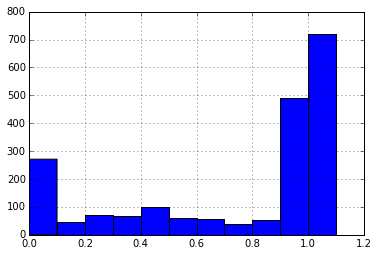

In [12]:
print len(df_nona)
df_nona.install_rate.hist(range=(0,1.1), bins=11)
# High install_rate in most cases

app_id
2194    1.001728
1142    1.001271
2739    1.000000
383     1.000000
644     1.000000
1070    1.000000
1279    1.000000
1666    1.000000
14      0.999195
2382    0.999111
dtype: float64

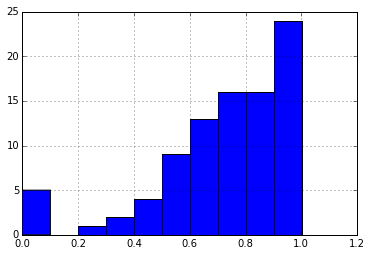

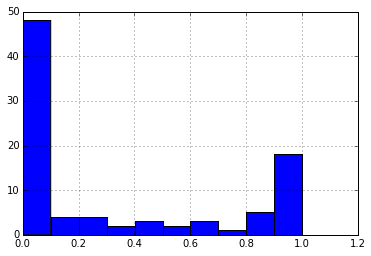

In [13]:
# top 10 apps by install_rate
df_nona.groupby('app_id').install_rate.mean().hist()
plt.figure()
df_nona.groupby('app_id').install_rate.min().hist()
apps_rk = df_nona.groupby('app_id').apply(lambda v: float(sum(v.accounts_provisioned)) / sum(v.district_size))
apps_rk.sort(inplace=True, ascending = False)
apps_rk.head(10)

district_id
2318    1.704425
759     1.205208
806     1.185307
1354    1.129693
1206    1.106503
2023    1.079534
1746    1.077206
212     1.061691
534     1.045455
2283    1.033738
dtype: float64

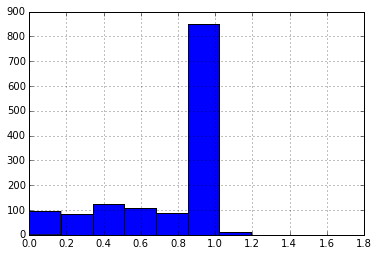

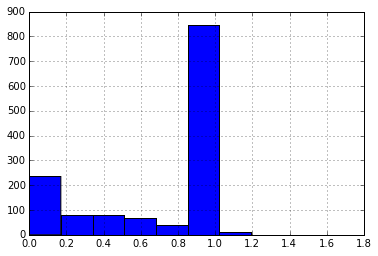

In [14]:
# top 10 districts by install_rate
df_nona.groupby('district_id').install_rate.mean().hist()
plt.figure()
df_nona.groupby('district_id').install_rate.min().hist()
dist_rk = df_nona.groupby('district_id').apply(lambda v: float(sum(v.accounts_provisioned)) / sum(v.district_size))
dist_rk.sort(inplace=True, ascending = False)
dist_rk.head(10)

In [15]:
df_nona.groupby('app_id').describe()

accounts_provisioned  district_id  district_size  install_rate
app_id                                                                      
2      count              2.000000     2.000000       2.000000      2.000000
       mean            1556.500000   545.500000    3368.000000      0.704014
       std             2148.897508   768.625071    4707.916949      0.346064
       min               37.000000     2.000000      39.000000      0.459310
       25%              796.750000   273.750000    1703.500000      0.581662
       50%             1556.500000   545.500000    3368.000000      0.704014
       75%             2316.250000   817.250000    5032.500000      0.826366
       max             3076.000000  1089.000000    6697.000000      0.948718
3      count            139.000000   139.000000     139.000000    139.000000
       mean            1768.309353  1115.381295    2259.417266      0.856479
       std             2489.083161   775.862703    2777.039978      0.281485
       min                0.000000     9.000000      95.000000      0.000000
       25%              369.000000   452.500000     554.000000      0.908823
       50%              746.000000   978.000000     949.000000      0.996504
       75%             1559.500000  1641.500000    2864.500000      1.000000
       max            11681.000000  2763.000000   11941.000000      1.079534
6      count            194.000000   194.000000     194.000000    194.000000
       mean            1941.644330  1109.927835    3233.768041      0.693405
       std             2226.829392   815.189787    2916.989740      0.368068
       min                0.000000    18.000000      16.000000      0.000000
       25%              475.000000   384.250000     736.000000      0.373138
       50%             1049.000000   972.500000    2333.500000      0.988290
       75%             2861.250000  1917.500000    5030.500000      1.000000
       max            11972.000000  2757.000000   11964.000000      1.106503
8      count              1.000000     1.000000       1.000000      1.000000
       mean             920.000000   269.000000     921.000000      0.998914
       std                     NaN          NaN            NaN           NaN
       min              920.000000   269.000000     921.000000      0.998914
       25%              920.000000   269.000000     921.000000      0.998914
       50%              920.000000   269.000000     921.000000      0.998914
...                            ...          ...            ...           ...
2579   std                     NaN          NaN            NaN           NaN
       min             8235.000000  2281.000000    8738.000000      0.942435
       25%             8235.000000  2281.000000    8738.000000      0.942435
       50%             8235.000000  2281.000000    8738.000000      0.942435
       75%             8235.000000  2281.000000    8738.000000      0.942435
       max             8235.000000  2281.000000    8738.000000      0.942435
2677   count              1.000000     1.000000       1.000000      1.000000
       mean              37.000000     2.000000      39.000000      0.948718
       std                     NaN          NaN            NaN           NaN
       min               37.000000     2.000000      39.000000      0.948718
       25%               37.000000     2.000000      39.000000      0.948718
       50%               37.000000     2.000000      39.000000      0.948718
       75%               37.000000     2.000000      39.000000      0.948718
       max               37.000000     2.000000      39.000000      0.948718
2683   count              8.000000     8.000000       8.000000      8.000000
       mean            1817.125000  1810.250000    2137.625000      0.726823
       std             1636.019511   934.563420    1472.300914      0.451326
       min                0.000000   128.000000     758.000000      0.000000
       25%              564.750000  1285.250000    1053.500000      0.638514
       50%

<a href=#Questions>Return to top</a>
# Multi-App Districts
This was bred out of multiple ways to aggregate for the previous section. Try looking at 1-app separately, then aggregate for multi-app

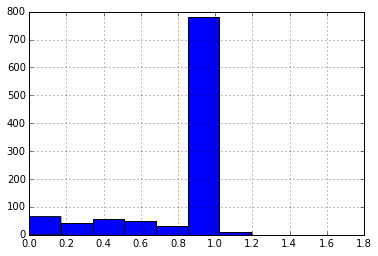

In [16]:
# checking if anything interesting comes out after looking at 1-app districts
picker = df_nona.groupby('district_id').app_id.nunique()
single_app = picker[picker==1]
df_nona[df_nona.district_id.isin(single_app.index)].install_rate.hist()

319


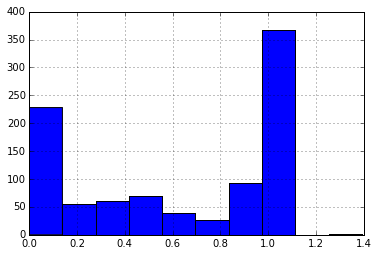

In [17]:
multi_app = picker[picker>1]
print len(multi_app)
df_nona[df_nona.district_id.isin(multi_app.index)].install_rate.hist()
# Looks like districts tend to not provision accounts for their secondary apps?

In [18]:
double_app = picker[picker==2]
print len(double_app)
df_nona['create_date'] = df_nona.created.map(pd.to_datetime)
dbl = df_nona[df_nona.district_id.isin(double_app.index)].groupby(['district_id', 'app_id', 'create_date']).install_rate.mean()
dbl

203


C:\Users\David\Anaconda\lib\site-packages\IPython\kernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


district_id  app_id  create_date
9            3       2014-08-27     0.045390
             1787    2014-10-28     0.000000
54           54      2013-01-24     0.000000
             63      2013-02-08     1.005880
68           3       2013-02-27     1.000000
             332     2014-01-10     0.479114
81           61      2013-03-15     0.995667
             214     2014-09-04     0.274154
88           6       2013-03-25     0.981355
             1881    2014-09-26     0.978396
95           6       2014-08-27     0.422982
             61      2013-04-02     0.920326
99           6       2013-04-03     0.337942
             334     2014-09-26     0.289823
111          6       2013-04-17     0.513289
             226     2014-09-02     0.209302
116          6       2013-04-22     1.017889
             12      2013-04-22     0.000000
123          6       2013-04-26     0.798717
             58      2013-08-07     0.240697
141          141     2013-05-16     0.824831
             348     2

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000F2DAC88>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000F0AC4A8>], dtype=object)

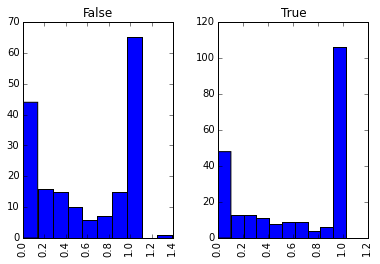

In [19]:
# Distinguishing between first and 2nd app adopted
dbl2 = dbl.reset_index()
dbl2['first_date'] = dbl2.groupby('district_id').create_date.transform(min)
dbl2['first'] = dbl2.create_date == dbl2.first_date
dbl2.hist('install_rate', by='first')
# Little to no difference in distribution

<a href=#Questions>Return to top</a>
# Growth

C:\Users\David\Anaconda\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


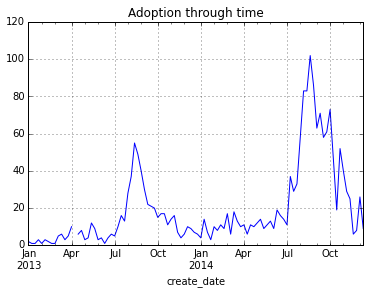

In [20]:
df_nona['create_date'] = df_nona.created.map(pd.to_datetime)
app_usage = df_nona.groupby('create_date').count().app_id
app_usage.resample('w', sum).plot(title='Adoption through time')
# districts tend to adopt apps in Aug each year, makes sense to prepare for the new school year

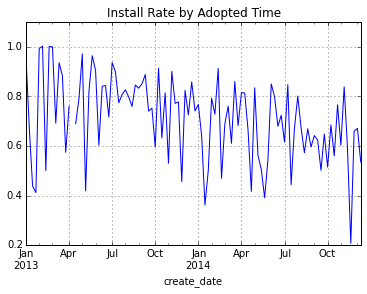

In [21]:
app_install = df_nona.groupby('create_date').apply(lambda v: sum(v.accounts_provisioned)/float(sum(v.district_size)))
app_install.resample('w', np.mean).plot(title='Install Rate by Adopted Time')
# install rate has deterioriated with more recent adoptions

<a href=#Questions>Return to Top</a>
# By District Size

C:\Users\David\Anaconda\lib\site-packages\IPython\kernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


segment
(0, 1000]         556
(1000, 4000]      468
(4000, 120000]    337
Name: district_id, dtype: int64

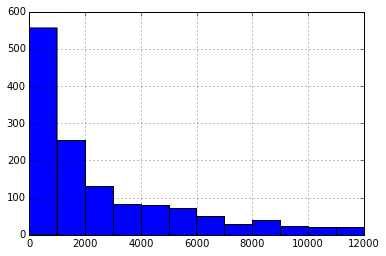

In [22]:
# segment districts by size
df_nona.groupby('district_id').district_size.mean().hist(bins=12)

df_nona['segment'] = pd.cut(df_nona.district_size, bins=[0,1000,4000,120000])
df_nona.groupby('segment').district_id.nunique()

In [23]:
print df_nona.groupby('segment').apply(lambda v: float(sum(v.accounts_provisioned))/sum(v.district_size))
# install_rate is higher for smaller districts

df_nona.groupby('segment').install_rate.describe()
# variance in install_rate is slightly lower for smaller districts

segment
(0, 1000]         0.820799
(1000, 4000]      0.694530
(4000, 120000]    0.644917
dtype: float64


segment              
(0, 1000]       count    719.000000
                mean       0.825776
                std        0.341101
                min        0.000000
                25%        0.919679
                50%        1.000000
                75%        1.000000
                max        1.129693
(1000, 4000]    count    729.000000
                mean       0.702023
                std        0.377411
                min        0.000000
                25%        0.393964
                50%        0.967854
                75%        1.000000
                max        1.205208
(4000, 120000]  count    534.000000
                mean       0.650142
                std        0.391752
                min        0.000000
                25%        0.297476
                50%        0.852853
                75%        0.999097
                max        1.704425
dtype: float64

In [24]:
apps_by_dist = df_nona.groupby(['segment', 'district_id']).app_id.nunique()
print apps_by_dist.groupby(level='segment').mean()
apps_by_dist.groupby(level='segment').describe()
# large districts adopt more apps and with higher variance/std

segment
(0, 1000]         1.293165
(1000, 4000]      1.557692
(4000, 120000]    1.584570
Name: app_id, dtype: float64


segment              
(0, 1000]       count    556.000000
                mean       1.293165
                std        0.948412
                min        1.000000
                25%        1.000000
                50%        1.000000
                75%        1.000000
                max       13.000000
(1000, 4000]    count    468.000000
                mean       1.557692
                std        1.503346
                min        1.000000
                25%        1.000000
                50%        1.000000
                75%        2.000000
                max       16.000000
(4000, 120000]  count    337.000000
                mean       1.584570
                std        1.407717
                min        1.000000
                25%        1.000000
                50%        1.000000
                75%        2.000000
                max       17.000000
dtype: float64

<a href=#Questions>Return to top</a>
# Most Popular

In [25]:
# by accounts_provisioned
top_apps = df_nona.groupby('app_id').accounts_provisioned.sum() 
# could possibly use the full df for this one, but it'd only include 6 more records anyway

top_apps.sort(inplace=True, ascending=False)
top_apps.head(10)

app_id
61      402738
6       376679
177     299846
137     286674
3       245795
63      213606
554     144835
58      131149
1230    126837
121     109962
Name: accounts_provisioned, dtype: int64

In [26]:
# by districts covered
top_apps2 = df_nona.groupby('app_id').district_id.nunique()

top_apps2.sort(inplace=True, ascending=False)
top_apps2.head(10)

app_id
6       194
208     174
3       139
61      126
177     123
63      120
1787     97
137      84
54       80
58       53
Name: district_id, dtype: int64

# Summary
- 18% of districts did not provide `district_size` data (bad data? bad token? worth investigating)
- ~80% of districts use 1 app, ~15% use 2 apps
- `install_rate` tends to suffer when a district adopts multiple apps (data-tracking issue or true behavior?)
- Districts tend to adopt apps in Aug, makes sense to prepare for the new school year
- Install rate has tended to deteriorate with more recent adoptions (focused too much on growing breadth vs. depth?)
- Install rate tends to be higher for smaller districts (and the variance also tends to be lower)
- Larger districts tend to adopt more apps (1.58 vs. 1.29)
- `app_id==6` is #1 in districts covered, #2 in accounts provisioned